# Análise Exploratória e de Correlação de Índices Socioeconômicos dos Estados Brasileiros

# Análise de Indicadores Socioeconômicos dos Estados Brasileiros

# Introdução

O Brasil é um país marcado por uma profunda **diversidade social, econômica e territorial**, o que torna o estudo do seu desenvolvimento humano um desafio multidimensional. A coexistência de realidades contrastantes, grandes centros urbanos com alto nível de renda e escolaridade versus regiões com infraestrutura limitada e baixos indicadores sociais, evidencia a complexidade dos fatores que moldam o bem-estar da população.

Neste projeto, buscou-se compreender **como diferentes variáveis socioeconômicas se relacionam com os componentes do Índice de Desenvolvimento Humano Municipal (IDHM)** — Renda, Educação e Longevidade — e de que forma esses fatores refletem as desigualdades estruturais do país. Por meio da análise de correlação entre dezenas de indicadores censitários e econômicos, foi possível identificar os **agentes e fenômenos que mais impactam o desenvolvimento humano no Brasil**.

A abordagem quantitativa adotada permitiu explorar padrões de associação entre renda per capita, formalização do trabalho, escolaridade e outros indicadores de bem-estar, destacando a interdependência entre as dimensões sociais. Além disso, ao observar as variáveis desagregadas por contexto **urbano e rural**, foi possível visualizar nuances importantes sobre a diversidade brasileira — revelando como o território influencia oportunidades, condições de vida e acesso a direitos fundamentais.

Assim, este estudo se propõe não apenas a analisar o IDHM e seus determinantes, mas também a **refletir sobre as desigualdades regionais e sociais que compõem o mosaico brasileiro**, contribuindo para uma compreensão mais ampla dos fenômenos que limitam (ou promovem) o desenvolvimento humano em diferentes contextos do país.

---

##  1. Importação de Bibliotecas

Nesta seção, são importadas as bibliotecas necessárias para a manipulação, análise e visualização dos dados.  
As principais são **pandas** e **numpy** para tratamento de dados, e **matplotlib** e **seaborn** para visualização.  
Além disso, são incluídas algumas bibliotecas auxiliares específicas do ambiente **Google Colab** e utilitários gerais.
python
Copiar código


In [112]:
# Bibliotecas essenciais para manipulação e análise de dados
import pandas as pd
import numpy as np
from functools import reduce

# Bibliotecas para visualização e análise de correlação
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas auxiliares/específicas
from google.colab import files # Mantenha se estiver usando o Google Colab para upload
from collections import defaultdict
import re

## 2. Carregamento dos Datasets

Nesta etapa, são carregados os **oito conjuntos de dados** utilizados na análise.  
Cada dataset representa um aspecto socioeconômico dos estados brasileiros:

1. **IDH**  
2. **Educação**  
3. **Habitação, Meio Ambiente e Participação na Política**  
4. **População**  
5. **Renda**  
6. **Saúde**  
7. **Trabalho**  
8. **Vulnerabilidade**

Os arquivos foram carregados manualmente através da função `files.upload()` do Google Colab e, em seguida, armazenados em `DataFrames` individuais para facilitar a exploração.


### 2.1 Dataset: IDH

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_IDH = pd.read_excel(fn)

# primeiras linhas dos dados de IDH
display(df_IDH.head())

Saving UF_IDH.xlsx to UF_IDH.xlsx
Arquivo "UF_IDH.xlsx" carregado com sucesso


,Territorialidades,Esperança de vida ao nascer 2010,População total 2010,População rural 2010,População urbana 2010,População de 0 a 1 ano de idade 2010,Mortalidade infantil 2010,População de 1 a 3 anos de idade 2010,População de 4 anos de idade 2010,População de 5 anos de idade 2010,...,Desagregação URBANO IDHM PNAD,Desagregação URBANO IDHM Ajustado à Desigualdade PNAD,Desagregação URBANO IDHM Longevidade Ajustado à Desigualdade PNAD,Desagregação URBANO IDHM Educação Ajustado à Desigualdade PNAD,Desagregação URBANO IDHM Renda Ajustado à Desigualdade PNAD,Desagregação URBANO IDHM Ajustado à Desigualdade - Perda pela desigualdade PNAD,Desagregação URBANO IDHM Longevidade Ajustado à Desigualdade - Perda pela desigualdade PNAD,Desagregação URBANO IDHM Educação Ajustado à Desigualdade - Perda pela desigualdade PNAD,Desagregação URBANO IDHM Renda Ajustado à Desigualdade - Perda pela desigualdade PNAD,Desagregação URBANO Renda per capita Censo
0,Brasil,73.94,190755799.0,29830007.0,160925792.0,2707991.0,16.70,8196384.0,2864361.0,2925979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.6
1,Acre,71.63,733559.0,201280.0,532279.0,14588.0,23.01,46757.0,15931.0,16315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,646.7
2,Alagoas,70.32,3120494.0,822634.0,2297860.0,53297.0,28.40,162101.0,56372.0,56759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522.1
3,Amapá,73.8,669526.0,68490.0,601036.0,14090.0,15.14,41600.0,14121.0,13990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.1
4,Amazonas,73.3,3483985.0,728495.0,2755490.0,73242.0,17.01,221213.0,76190.0,77817.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.5


### 2.2 Dataset: Educação

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_educacao = pd.read_excel(fn)

# primeiras linhas dos dados de educação
display(df_educacao.head())

Saving UF_Educação.xlsx to UF_Educação.xlsx
Arquivo "UF_Educação.xlsx" carregado com sucesso


,Territorialidades,Taxa de analfabetismo - 11 a 14 anos de idade 2010,% de 5 a 6 anos de idade na escola 2010,% de 11 a 13 anos de idade nos anos finais do ensino fundamental ou com ensino fundamental completo 2010,% de 18 a 20 anos de idade com ensino médio completo 2010,Taxa de analfabetismo - 15 a 17 anos de idade 2010,Taxa de analfabetismo - 18 a 24 anos de idade 2010,Taxa de analfabetismo - 25 a 29 anos de idade 2010,% de 0 a 5 anos de idade na escola 2010,Taxa de analfabetismo - 25 anos ou mais de idade 2010,...,Desagregação URBANO Taxa de frequência líquida ao ensino fundamental Censo,Desagregação URBANO Taxa de frequência líquida ao ensino médio Censo,Desagregação URBANO Taxa de frequência líquida ao ensino básico Censo,Desagregação URBANO Taxa de frequência líquida ao ensino superior Censo,Desagregação URBANO % de 12 a 14 anos de idade nos anos finais do ensino fundamental ou com ensino fundamental completo Censo,Desagregação URBANO % de 6 a 14 anos no ensino fundamental com 2 anos ou mais de atraso idade-série Censo,Desagregação URBANO % de 6 a 17 anos no ensino básico com 2 anos ou mais de atraso idade-série Censo,Desagregação URBANO % de 15 a 17 anos de idade frequentando o ensino fundamental Censo,Desagregação URBANO % de 18 a 24 anos de idade frequentando o ensino fundamental Censo,Desagregação URBANO % de 18 a 24 anos de idade frequentando o ensino fundamental Censo.1
0,Brasil,3.24,91.12,84.86,41.01,2.20,2.61,3.96,43.15,11.82,...,94.25,51.76,92.75,15.80,NaN,13.68,17.31,29.47,4.01,10.84
1,Acre,6.64,78.72,75.96,31.98,4.47,5.87,9.03,29.70,21.29,...,92.77,51.05,90.45,13.13,NaN,14.15,16.17,25.54,4.77,13.41
2,Alagoas,8.96,88.74,81.57,25.86,6.13,8.43,14.83,38.46,30.57,...,93.43,38.05,91.41,11.71,NaN,18.18,24.52,41.79,8.07,12.83
3,Amapá,3.81,82.79,80.89,35.73,2.28,2.38,3.62,29.17,11.20,...,93.54,49.07,92.25,13.99,NaN,17.15,21.06,32.70,4.95,14.47
4,Amazonas,6.54,80.52,75.33,28.76,3.96,4.25,5.18,30.75,12.30,...,92.18,40.99,90.76,12.33,NaN,16.95,22.49,39.89,7.50,16.03


### 2.3 Dataset: Habitação, Meio Ambiente e Participação na Política

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_hab_amb_pol = pd.read_excel(fn)

# primeiras linhas dos dados de Habitação, Meio Ambiente e Participação na Política
display(df_hab_amb_pol.head())

Saving UF_Habitação_MeioAmbiente_ParticipaçãoPolitica.xlsx to UF_Habitação_MeioAmbiente_ParticipaçãoPolitica.xlsx
Arquivo "UF_Habitação_MeioAmbiente_ParticipaçãoPolitica.xlsx" carregado com sucesso


,Territorialidades,% da população em domicílios com água encanada 2010,% da população que vive em domicílios com banheiro e água encanada 2010,% de pessoas em domicílios urbanos com coleta de lixo 2010,% de pessoas em domicílios com energia elétrica 2010,% da população que vive em domicílios com densidade superior a 2 pessoas por dormitório 2010,% de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010,% de cobertura vegetal natural 2013,Concentração dos focos de calor 2013,% de vereadores do sexo feminino 2013,...,Desagregação URBANO % de prefeitos do sexo feminino TSE,Desagregação URBANO % de governadores dos sexo feminino TSE,Desagregação URBANO % de deputados estaduais dos sexo feminino TSE,Desagregação URBANO % de deputados federais dos sexo feminino TSE,Desagregação URBANO % de senadores do sexo feminino TSE,Desagregação URBANO % da população urbana residente em domicílios ligados à rede de abastecimento de água SNIS,Desagregação URBANO % da população urbana residente em domicílios ligados à rede de esgotamento sanitário SNIS,Desagregação URBANO % de esgoto tratado SNIS,Desagregação URBANO Existência de coleta seletiva SNIS,Desagregação URBANO % da população urbana atendida por serviços regulares de coleta de resíduos domiciliares SNIS
0,Brasil,92.72,87.16,97.02,98.58,27.83,3.42,67.56,1000.00,13.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acre,86.51,47.42,93.63,91.14,46.05,9.06,89.19,20.44,14.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alagoas,77.56,75.64,96.16,98.98,35.04,5.19,14.75,5.60,15.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amapá,91.44,66.38,96.38,98.27,53.98,4.77,91.86,7.99,19.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amazonas,77.32,62.16,92.98,92.18,57.95,7.36,95.61,30.94,11.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.4 Dataset: População

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_populacao = pd.read_excel(fn)

# primeiras linhas dos dados da população
display(df_populacao.head())

Saving UF_População.xlsx to UF_População.xlsx
Arquivo "UF_População.xlsx" carregado com sucesso


,Territorialidades,Esperança de vida ao nascer 2010,População total 2010,População rural 2010,População urbana 2010,População de 0 a 1 ano de idade 2010,Mortalidade infantil 2010,População de 1 a 3 anos de idade 2010,População de 4 anos de idade 2010,População de 5 anos de idade 2010,...,Desagregação URBANO População de 11 a 13 anos de idade PNAD,Desagregação URBANO População de 15 a 17 anos de idade PNAD,Desagregação URBANO População de 15 anos ou mais de idade PNAD,Desagregação URBANO População de 18 anos ou mais de idade PNAD,Desagregação URBANO População de 18 a 20 anos de idade PNAD,Desagregação URBANO População de 18 a 24 anos de idade PNAD,Desagregação URBANO População de 25 anos ou mais de idade PNAD,Desagregação URBANO População de 65 anos ou mais de idade PNAD,"Desagregação URBANO População total em domicílios particulares permanentes, exceto com renda nula PNAD",Desagregação URBANO População total PNAD
0,Brasil,73.94,190755799.0,29830007.0,160925792.0,2707991.0,16.70,8196384.0,2864361.0,2925979.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acre,71.63,733559.0,201280.0,532279.0,14588.0,23.01,46757.0,15931.0,16315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alagoas,70.32,3120494.0,822634.0,2297860.0,53297.0,28.40,162101.0,56372.0,56759.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amapá,73.8,669526.0,68490.0,601036.0,14090.0,15.14,41600.0,14121.0,13990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amazonas,73.3,3483985.0,728495.0,2755490.0,73242.0,17.01,221213.0,76190.0,77817.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.5 Dataset: Renda

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_renda = pd.read_excel(fn)

# primeiras linhas dos dados da renda
display(df_renda.head())

Saving UF_Renda.xlsx to UF_Renda.xlsx
Arquivo "UF_Renda.xlsx" carregado com sucesso


,Territorialidades,% indivíduos pertencentes ao quinto mais pobre da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos dois quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos três quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes aos quatro quintos mais pobres da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,% indivíduos pertencentes ao quinto mais rico da distribuição dos indivíduos segundo a renda domiciliar per capita 2010,10% mais ricos 2010,Razão 20% mais ricos / 40% mais pobres 2010,Razão 10% mais ricos / 40% mais pobres 2010,Índice de Theil-L 2010,...,Desagregação URBANO Renda domiciliar per capita mínima do décimo mais rico Censo,Desagregação URBANO % de extremamente pobres Censo,Desagregação URBANO % de pobres Censo,Desagregação URBANO % de vulneráveis à pobreza Censo,Desagregação URBANO % de crianças com até 14 anos de idade extremamente pobres Censo,Desagregação URBANO % de crianças pobres Censo,Desagregação URBANO % de crianças vulneráveis à pobreza Censo,Desagregação URBANO Renda per capita dos extremamente pobres Censo,Desagregação URBANO Renda per capita dos pobres Censo,Desagregação URBANO Renda per capita dos vulneráveis à pobreza Censo
0,Brasil,2.41,8.59,19.23,36.60,63.40,48.93,14.83,22.78,0.68,...,1727.67,3.59,10.57,26.93,6.61,19.06,42.50,36.60,85.12,156.66
1,Acre,1.4,6.89,16.78,34.23,65.77,50.56,19.05,29.35,0.73,...,1266.67,6.28,18.09,40.22,10.02,28.05,55.42,32.20,81.83,146.17
2,Alagoas,1.85,7.62,17.35,34.03,65.97,51.76,17.21,27.17,0.75,...,1005.00,10.77,26.35,52.28,17.29,40.28,69.11,35.37,78.35,137.68
3,Amapá,2.16,7.88,17.82,36.04,63.96,47.44,16.22,24.07,0.68,...,1377.50,7.10,20.60,41.90,10.49,29.46,54.44,37.21,83.37,141.36
4,Amazonas,1.31,6.40,15.68,32.09,67.91,53.64,21.40,33.55,0.80,...,1206.00,7.70,20.59,42.92,11.81,30.37,56.99,35.03,80.45,141.77


### 2.6 Dataset: Saúde

In [7]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_saude = pd.read_excel(fn)

# primeiras linhas dos dados de saúde
display(df_saude.head())

Saving UF_Saude.xlsx to UF_Saude.xlsx
Arquivo "UF_Saude.xlsx" carregado com sucesso


,Territorialidades,Taxa de mortalidade infantil 2013,% de nascidos vivos com pelo menos sete consultas de pré-natal 2013,% de nascidos vivos com baixo peso ao nascer 2013,Taxa bruta de mortalidade 2013,Taxa de mortalidade por homicídios 2013,Taxa de mortalidade por doenças não transmissíveis 2013,Taxa de mortalidade de mulheres por câncer da mama 2013,Taxa de mortalidade por câncer de próstata 2013,Taxa de incidência de AIDS 2013,...,Desagregação URBANO Taxa de mortalidade de mulheres por câncer da mama DATASUS,Desagregação URBANO Taxa de mortalidade por câncer de próstata DATASUS,Desagregação URBANO Taxa de incidência de AIDS DATASUS,Desagregação URBANO Taxa de mortalidade por acidente de trânsito DATASUS,Desagregação URBANO Taxa de mortalidade por suicídio DATASUS,Desagregação URBANO Taxa de mortalidade por agressão DATASUS,Desagregação URBANO Taxa de mortalidade materna DATASUS,Desagregação URBANO % de internações por doenças relacionadas ao saneamento ambiental inadequado DATASUS,Desagregação URBANO % de internações por condições sensíveis à atenção primária DATASUS,Desagregação URBANO % de pessoas cobertas por planos de saúde suplementar DATASUS
0,Brasil,13.39,62.42,8.51,6.00,28.31,327.34,13.84,13.99,11.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acre,16.4,38.42,7.67,4.27,30.39,197.30,7.76,9.75,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alagoas,16.21,46.12,8.37,5.82,65.47,291.04,8.46,10.44,6.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amapá,19.92,31.71,8.76,3.64,30.61,140.95,4.63,6.25,10.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amazonas,17.22,35.28,7.74,3.97,31.33,165.10,7.93,8.56,29.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.7 Dataset: Trabalho

In [8]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_trabalho = pd.read_excel(fn)

# primeiras linhas dos dados de trabalho
display(df_trabalho.head())

Saving UF_Trabalho.xlsx to UF_Trabalho.xlsx
Arquivo "UF_Trabalho.xlsx" carregado com sucesso


,Territorialidades,Taxa de atividade - 10 anos ou mais de idade 2010,Taxa de atividade - 10 a 14 anos de idade 2010,Taxa de atividade - 15 a 17 anos de idade 2010,Taxa de atividade - 18 anos ou mais de idade 2010,Taxa de atividade - 18 a 24 anos de idade 2010,Taxa de atividade - 25 a 29 anos de idade 2010,Taxa de desocupação - 10 anos ou mais de idade 2010,Taxa de desocupação - 10 a 14 anos de idade 2010,Taxa de desocupação - 15 a 17 anos de idade 2010,...,Desagregação URBANO % dos ocupados no setor de construção Censo,Desagregação URBANO % dos ocupados no setor comércio Censo,Desagregação URBANO % dos ocupados no setor de serviços Censo,Desagregação URBANO Rendimento médio dos ocupados Censo,Desagregação URBANO % dos ocupados sem rendimento Censo,Desagregação URBANO % dos ocupados com rendimento de até 1 salário mínimo Censo,Desagregação URBANO % dos ocupados com rendimento de até 2 salários mínimo Censo,Desagregação URBANO % dos ocupados com rendimento de até 3 salários mínimo Censo,Desagregação URBANO % dos ocupados com rendimento de até 5 salários mínimo Censo,Desagregação URBANO Índice de Theil-L dos rendimentos do trabalho - 18 anos ou mais de idade Censo
0,Brasil,57.93,7.53,29.78,66.54,68.05,78.23,7.98,17.30,24.19,...,7.93,17.10,48.73,1418.93,2.43,16.34,66.24,79.48,89.18,0.49
1,Acre,53.08,10.32,24.02,64.86,58.94,71.20,8.33,13.10,25.65,...,9.34,17.06,55.65,1275.85,2.82,19.37,69.50,80.64,90.37,0.48
2,Alagoas,49.5,9.02,24.63,58.69,56.25,67.36,11.04,10.84,23.65,...,7.59,18.46,49.29,1026.82,4.27,30.00,78.98,86.70,92.74,0.54
3,Amapá,56.38,7.72,22.92,69.70,60.57,74.72,12.25,21.57,27.44,...,8.54,18.40,52.36,1364.27,3.13,20.70,66.77,77.65,88.20,0.50
4,Amazonas,53.99,10.95,25.21,65.32,57.48,70.41,10.16,13.98,21.88,...,7.41,17.48,47.05,1272.57,4.94,21.75,71.48,82.82,91.20,0.51


### 2.8 Dataset: Vulnerabilidade

In [9]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_vulnerabilidade = pd.read_excel(fn)

# primeiras linhas dos dados de vulnerabilidade
display(df_vulnerabilidade.head())

Saving UF_Vulnerabilidade.xlsx to UF_Vulnerabilidade.xlsx
Arquivo "UF_Vulnerabilidade.xlsx" carregado com sucesso


,Territorialidades,% de mulheres de 10 a 17 anos de idade que tiveram filhos 2010,"% de mães chefes de família, sem fundamental completo e com pelo menos um filho menor de 15 anos de idade 2010",% de crianças que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo 2010,% de crianças de 0 a 5 anos de idade que não frequentam a escola 2010,% de crianças de 6 a 14 anos de idade que não frequentam a escola 2010,% de pessoas em domicílios em que nenhum morador tem ensino fundamental completo 2010,% de 15 a 24 anos de idade que não estudam nem trabalham em domicílios vulneráveis à pobreza 2010,% de pessoas de 18 anos ou mais sem ensino fundamental completo e em ocupação informal 2010,% de pessoas em domicílios vulneráveis à pobreza e em que ninguém tem ensino fundamental completo 2010,...,Desagregação URBANO % de analfabetos com 15 anos ou mais de idade no Cadastro Único Cadastro Único,"Desagregação URBANO % de pessoas inscritas no Cadastro Único sem abastecimento de água, esgotamento sanitário e coleta de lixo adequados Cadastro Único",Desagregação URBANO % de pessoas inscritas no Cadastro Único sem abastecimento de água adequado Cadastro Único,Desagregação URBANO % de pessoas inscritas no Cadastro Único sem esgotamento sanitário adequado Cadastro Único,Desagregação URBANO % de pessoas inscritas no Cadastro Único sem coleta de lixo adequada Cadastro Único,"Desagregação URBANO % de pessoas inscritas no Cadastro Único sem abastecimento de água, esgotamento sanitário e coleta de lixo adequados Cadastro Único.1",Desagregação URBANO Mortalidade infantil PNAD,Desagregação URBANO Taxa de envelhecimento PNAD,Desagregação URBANO Razão de dependência PNAD,Desagregação URBANO % de crianças com até 14 anos de idade extremamente pobres Censo
0,Brasil,2.89,17.23,30.39,56.85,3.31,24.92,11.61,35.24,13.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.61
1,Acre,4.92,28.72,41.14,70.30,8.17,33.21,17.41,43.75,24.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02
2,Alagoas,3.8,26.49,49.55,61.54,4.76,40.34,21.65,51.13,31.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.29
3,Amapá,4.37,27.37,24.29,70.83,4.66,18.76,16.02,32.55,13.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.49
4,Amazonas,5.19,25.77,33.69,69.25,8.80,26.49,17.09,39.68,20.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.81


## 3. Tratamento dos Dados
Nesta etapa, são realizadas operações de limpeza e padronização nos oito datasets, com o objetivo de preparar os dados para análise.

As principais ações incluem:
1. **Remoção das linhas que não correspondem a um estado**, mantendo apenas as informações estaduais;
2. **Eliminação de colunas com todos os valores ausentes (NaN)**;
3. **Remoção de colunas duplicadas referentes ao mesmo indicador em diferentes anos**, mantendo apenas a versão mais antiga de cada indicador.
4. **Preenchimento dos Valores Ausentes** em algumas colunas de determinados estados.


### 3.1 Remoção da linha "Brasil" e de outras (que não são território do Brasil) de todos os DataFrames

In [167]:
# Lista de dataframes originais
dfs_originais = [
    df_IDH,
    df_educacao,
    df_hab_amb_pol,
    df_populacao,
    df_renda,
    df_saude,
    df_trabalho,
    df_vulnerabilidade
]

# Remove a linha onde 'Territorialidades' é 'Brasil' e as últimas 3 linhas de cada dataframe
dfs_processados = [df[df['Territorialidades'] != 'Brasil'].copy().iloc[:-3] for df in dfs_originais]

# Atualiza as variáveis originais
df_IDH, df_educacao, df_hab_amb_pol, df_populacao, df_renda, df_saude, df_trabalho, df_vulnerabilidade = dfs_processados

print("Linha com 'Territorialidades' igual a 'Brasil' e as últimas 3 linhas removidas de todos os dataframes.")

Linha com 'Territorialidades' igual a 'Brasil' e as últimas 3 linhas removidas de todos os dataframes.


### 3.2 Remoção de colunas com todos os valores ausentes (NaN)

Alguns datasets possuem colunas totalmente vazias.  
Essas colunas não trazem informação útil, portanto são eliminadas.

In [168]:
# retirando colunas com todos os valores NaN do df_IDH
df_IDH_limpo = df_IDH.dropna(axis=1, how='all')
df_educacao_limpo = df_educacao.dropna(axis=1, how='all')
df_hab_amb_pol_limpo = df_hab_amb_pol.dropna(axis=1, how='all')
df_populacao_limpo = df_populacao.dropna(axis=1, how='all')
df_renda_limpo = df_renda.dropna(axis=1, how='all')
df_saude_limpo = df_saude.dropna(axis=1, how='all')
df_trabalho_limpo = df_trabalho.dropna(axis=1, how='all')
df_vulnerabilidade_limpo = df_vulnerabilidade.dropna(axis=1, how='all')

print(f"IDH: ")
print(f"Número de colunas antes: {df_IDH.shape[1]}")
print(f"Número de colunas depois: {df_IDH_limpo.shape[1]}\n")

print(f"Educação: ")
print(f"Número de colunas antes: {df_educacao.shape[1]}")
print(f"Número de colunas depois: {df_educacao_limpo.shape[1]}\n")

print(f"Habitação, Meio Ambiente e Participação na Política: ")
print(f"Número de colunas antes: {df_hab_amb_pol.shape[1]}")
print(f"Número de colunas depois: {df_hab_amb_pol_limpo.shape[1]}\n")

print(f"População: ")
print(f"Número de colunas antes: {df_populacao.shape[1]}")
print(f"Número de colunas depois: {df_populacao_limpo.shape[1]}\n")

print(f"Renda: ")
print(f"Número de colunas antes: {df_renda.shape[1]}")
print(f"Número de colunas depois: {df_renda_limpo.shape[1]}\n")

print(f"Saúde: ")
print(f"Número de colunas antes: {df_saude.shape[1]}")
print(f"Número de colunas depois: {df_saude_limpo.shape[1]}\n")

print(f"Trabalho: ")
print(f"Número de colunas antes: {df_trabalho.shape[1]}")
print(f"Número de colunas depois: {df_trabalho_limpo.shape[1]}\n")

print(f"Vulnerabilidade: ")
print(f"Número de colunas antes: {df_vulnerabilidade.shape[1]}")
print(f"Número de colunas depois: {df_vulnerabilidade_limpo.shape[1]}\n")

IDH: 
Número de colunas antes: 355
Número de colunas depois: 273

Educação: 
Número de colunas antes: 190
Número de colunas depois: 140

Habitação, Meio Ambiente e Participação na Política: 
Número de colunas antes: 58
Número de colunas depois: 31

População: 
Número de colunas antes: 289
Número de colunas depois: 237

Renda: 
Número de colunas antes: 217
Número de colunas depois: 153

Saúde: 
Número de colunas antes: 49
Número de colunas depois: 17

Trabalho: 
Número de colunas antes: 106
Número de colunas depois: 102

Vulnerabilidade: 
Número de colunas antes: 100
Número de colunas depois: 78



### 3.3 Remoção de colunas duplicadas de diferentes anos

Alguns indicadores aparecem repetidos em diferentes colunas, apenas variando o ano (por exemplo: *“IDHM 2010”* e *“IDHM 2012”*).

Para manter a consistência, foi aplicada uma filtragem que **mantém apenas o indicador mais antigo** (primeiro ano disponível) de cada grupo de colunas.


In [169]:
# Função para extrair o nome base e o ano de uma coluna
def extract_base_name_and_year(col_name):
    match = re.match(r'(.*)\s(\d{4})$', col_name)
    if match:
        return match.groups()
    return col_name, None

# Dicionário com os dataframes limpos
cleaned_dfs = {
    'df_IDH_limpo': df_IDH_limpo,
    'df_educacao_limpo': df_educacao_limpo,
    'df_hab_amb_pol_limpo': df_hab_amb_pol_limpo,
    'df_populacao_limpo': df_populacao_limpo,
    'df_renda_limpo': df_renda_limpo,
    'df_saude_limpo': df_saude_limpo,
    'df_trabalho_limpo': df_trabalho_limpo,
    'df_vulnerabilidade_limpo': df_vulnerabilidade_limpo
}

# Dicionário para armazenar os dataframes filtrados
filtered_dfs = {}

# Aplica a filtragem para cada dataframe
for df_name, df in cleaned_dfs.items():
    cols_to_drop = []
    base_name_years = defaultdict(list)

    for col in df.columns:
        base_name, year = extract_base_name_and_year(col)
        if year:
            base_name_years[base_name].append((year, col))

    for base_name, year_cols in base_name_years.items():
        if len(year_cols) > 1:
            year_cols.sort()  # mantém a coluna com o ano mais antigo
            cols_to_drop.extend([col for year, col in year_cols[1:]])

    # Remove as colunas duplicadas
    filtered_df = df.drop(columns=cols_to_drop)
    filtered_dfs[df_name + '_filtered'] = filtered_df

    # Relatório resumido
    print(f"\n {df_name}")
    print(f" - Colunas antes: {df.shape[1]}")
    print(f" - Colunas depois: {filtered_df.shape[1]}")
    print(f" - Colunas removidas:")
    if cols_to_drop:
        for col in cols_to_drop:
            print(f"   • {col}")
    else:
        print("   Nenhuma coluna removida.")
    print("-" * 50)


 df_IDH_limpo
 - Colunas antes: 273
 - Colunas depois: 253
 - Colunas removidas:
   • Esperança de vida ao nascer 2012
   • População total 2012
   • Mortalidade infantil 2012
   • População de 15 a 17 anos de idade 2012
   • População de 18 a 24 anos de idade 2012
   • População de 15 anos ou mais de idade 2012
   • População de 18 anos ou mais de idade 2012
   • População de 25 anos ou mais de idade 2012
   • População de 65 anos ou mais de idade 2012
   • População total em domicílios particulares permanentes 2012
   • População total em domicílios particulares permanentes, exceto com renda nula 2012
   • IDHM 2012
   • IDHM Renda 2012
   • IDHM Longevidade 2012
   • IDHM Educação 2012
   • Subíndice de frequência escolar - IDHM Educação 2012
   • Subíndice de escolaridade - IDHM Educação 2012
   • Razão de dependência 2012
   • Taxa de envelhecimento 2012
   • Renda per capita 2012
--------------------------------------------------

 df_educacao_limpo
 - Colunas antes: 140
 - Colu

### 3.4 Análise de Valores Ausentes (NaN)

Após as etapas anteriores de limpeza, é importante verificar se ainda existem **valores ausentes (NaN)** nos datasets.  
A análise a seguir percorre todos os DataFrames para identificar:

- Quais colunas ainda possuem valores nulos;  
- Em quais **territorialidades (estados)** esses valores estão presentes;  
- E quantos valores ausentes existem por coluna.


In [170]:
# Dicionário contendo os dataframes originais
original_dfs = {
    'df_IDH': df_IDH_limpo,
    'df_educacao': df_educacao_limpo,
    'df_hab_amb_pol': df_hab_amb_pol_limpo,
    'df_populacao': df_populacao_limpo,
    'df_renda': df_renda_limpo,
    'df_saude': df_saude_limpo,
    'df_trabalho': df_trabalho_limpo,
    'df_vulnerabilidade': df_vulnerabilidade_limpo
}

print("--- Análise de Valores Nulos (NaN) nos DataFrames Originais ---\n")

# Dicionário para armazenar as territorialidades com NaN
all_nan_territorialidades = {}

for df_name, df in original_dfs.items():
    print(f"DataFrame: {df_name}")
    print("-" * (len(df_name) + 11))

    # Remove linhas de metadados e espaços em branco
    df_cleaned = df[~df['Territorialidades'].str.contains('Elaboração:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Colunas com pelo menos um NaN
    colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()

    if not colunas_com_nan:
        print(" Não há valores nulos (NaN) neste DataFrame (após remover metadados e linhas em branco).")
    else:
        print("As colunas a seguir contêm valores nulos (NaN):")

        # Guarda os resultados por coluna
        territorialidades_nulas_por_coluna = {}

        for coluna in colunas_com_nan:
            if 'Territorialidades' in df_cleaned.columns:
                territorialidades_com_nan = df_cleaned[df_cleaned[coluna].isna()]['Territorialidades'].tolist()
            else:
                territorialidades_com_nan = []

            territorialidades_nulas_por_coluna[coluna] = territorialidades_com_nan

            num_territorialidades = len(territorialidades_com_nan)
            print(f"  - {coluna}: {df_cleaned[coluna].isna().sum()} valores nulos ({num_territorialidades} Territorialidades)")

            if num_territorialidades > 0:
                print(f"    Territorialidades: {', '.join(territorialidades_com_nan)}")
            else:
                print("    Territorialidades: Nenhuma")

        all_nan_territorialidades[df_name] = territorialidades_nulas_por_coluna

    print("\n" + "=" * 50 + "\n")


--- Análise de Valores Nulos (NaN) nos DataFrames Originais ---

DataFrame: df_IDH
-----------------
 Não há valores nulos (NaN) neste DataFrame (após remover metadados e linhas em branco).


DataFrame: df_educacao
----------------------
 Não há valores nulos (NaN) neste DataFrame (após remover metadados e linhas em branco).


DataFrame: df_hab_amb_pol
-------------------------
As colunas a seguir contêm valores nulos (NaN):
  - % de vereadores do sexo feminino 2013: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - % de prefeitos do sexo feminino 2013: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - Desagregação RURAL % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada Censo: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - Desagregação URBANO % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada Censo: 1 valores nulos

### 3.5 Preenchimento dos Valores Ausentes

Durante a análise anterior, observou-se que alguns estados apresentavam valores ausentes em determinados indicadores — em especial, **Distrito Federal** e **Roraima**.

Para manter a coerência dos dados sem distorcer as médias nacionais, optou-se por preencher os valores ausentes utilizando a **média da região geográfica** a que cada estado pertence.  
Essa abordagem preserva a consistência estatística entre os estados e evita a exclusão de registros importantes.


In [171]:
# DF → média do Centro-Oeste (GO, MT, MS)
# Roraima → média do Norte (AC, AM, AP, PA, RO, TO)

# Dicionário de estados por região
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

for df_name, df in original_dfs.items():
    print(f"Tratando NaN no {df_name}...")

    # Remove linhas de metadados e espaços vazios
    df_cleaned = df[~df['Territorialidades'].str.contains('Elaboração:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Garante que 'Territorialidades' seja o índice
    df_cleaned.set_index('Territorialidades', inplace=True)

    # Filtra colunas com NaN
    colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()

    if not colunas_com_nan:
        print("✅ Nenhum NaN encontrado. Pulando.\n")
        continue

    # === Distrito Federal ===
    centro_oeste_estados = ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul']
    if 'Distrito Federal' in df_cleaned.index:
        for col in colunas_com_nan:
            if pd.isna(df_cleaned.loc['Distrito Federal', col]):
                media_centro_oeste = df_cleaned.loc[centro_oeste_estados, col].mean(skipna=True)
                df_cleaned.loc['Distrito Federal', col] = media_centro_oeste
                print(f"🔧 DF: Substituído NaN em '{col}' pela média do Centro-Oeste ({media_centro_oeste:.4f})")

    # === Roraima ===
    norte_estados = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Tocantins']
    if 'Roraima' in df_cleaned.index:
        for col in colunas_com_nan:
            if pd.isna(df_cleaned.loc['Roraima', col]):
                media_norte = df_cleaned.loc[norte_estados, col].mean(skipna=True)
                df_cleaned.loc['Roraima', col] = media_norte
                print(f"🔧 RR: Substituído NaN em '{col}' pela média do Norte ({media_norte:.4f})")

    # Atualiza o DataFrame no dicionário
    original_dfs[df_name] = df_cleaned.reset_index()

    print(f"✅ Tratamento de NaN concluído para {df_name}\n")

print("=== Imputação finalizada para DF e Roraima em todos os DataFrames ===")


Tratando NaN no df_IDH...
✅ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_educacao...
✅ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_hab_amb_pol...
🔧 DF: Substituído NaN em '% de vereadores do sexo feminino 2013' pela média do Centro-Oeste (12.6833)
🔧 DF: Substituído NaN em '% de prefeitos do sexo feminino 2013' pela média do Centro-Oeste (11.4533)
🔧 DF: Substituído NaN em 'Desagregação RURAL % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada Censo' pela média do Centro-Oeste (45178.3567)
🔧 DF: Substituído NaN em 'Desagregação URBANO % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada Censo' pela média do Centro-Oeste (18783.2800)
✅ Tratamento de NaN concluído para df_hab_amb_pol

Tratando NaN no df_populacao...
✅ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_renda...
✅ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_saude...
✅ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_trabalho...


### 3.6 Verificação Final de Valores Nulos

Após o preenchimento dos valores ausentes, é realizada uma verificação final para garantir que **nenhum valor nulo permaneça** em qualquer um dos DataFrames.


In [172]:
print("=== Verificação Final de Valores Nulos (NaN) ===\n")

for df_name, df in original_dfs.items():
    # Confirma que o DataFrame está limpo de metadados
    df_cleaned = df[~df['Territorialidades'].str.contains('Elaboração:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Conta o total de NaNs
    total_nans = df_cleaned.isna().sum().sum()

    if total_nans == 0:
        print(f" {df_name}: Nenhum valor nulo encontrado.")
    else:
        # Identifica colunas problemáticas
        colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()
        print(f" {df_name}: {total_nans} valores nulos restantes.")
        print(f"   Colunas com NaN: {', '.join(colunas_com_nan)}")

print("\n=== Verificação concluída ===")


=== Verificação Final de Valores Nulos (NaN) ===

 df_IDH: Nenhum valor nulo encontrado.
 df_educacao: Nenhum valor nulo encontrado.
 df_hab_amb_pol: Nenhum valor nulo encontrado.
 df_populacao: Nenhum valor nulo encontrado.
 df_renda: Nenhum valor nulo encontrado.
 df_saude: Nenhum valor nulo encontrado.
 df_trabalho: Nenhum valor nulo encontrado.
 df_vulnerabilidade: Nenhum valor nulo encontrado.

=== Verificação concluída ===


## 4. Integração dos Datasets

Após o carregamento individual de cada conjunto de dados, é necessário **integrá-los em um único DataFrame** para permitir análises conjuntas entre os diferentes indicadores socioeconômicos.

Nesta etapa:

- Os datasets são mesclados progressivamente pelo campo comum **`'Territorialidades'`**, que identifica cada estado.
- Em seguida, as colunas duplicadas geradas durante o merge são **limpas e renomeadas** para manter um dataset coerente e sem redundâncias.


### 4.1 Junção dos Datasets

In [173]:
# Pega apenas os dataframes filtrados
dfs_para_juntar = list(filtered_dfs.values())

# Faz o merge progressivo de todos pelo campo 'Territorialidades'
df_unificado = reduce(
    lambda left, right: pd.merge(left, right, on='Territorialidades', how='outer'),
    dfs_para_juntar
)

# Mostra o resultado
print("DataFrame unificado criado com sucesso!")
print(f"Número de linhas: {df_unificado.shape[0]}")
print(f"Número de colunas: {df_unificado.shape[1]}")

display(df_unificado.head(27))

DataFrame unificado criado com sucesso!
Número de linhas: 18
Número de colunas: 947


,Territorialidades,Esperança de vida ao nascer 2010_x,População total 2010_x,População rural 2010_x,População urbana 2010_x,População de 0 a 1 ano de idade 2010_x,Mortalidade infantil 2010_x,População de 1 a 3 anos de idade 2010_x,População de 4 anos de idade 2010_x,População de 5 anos de idade 2010_x,...,Desagregação URBANO % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados Censo,Desagregação URBANO % de pessoas em domicílios vulneráveis à pobreza e que gastam mais de uma hora até o trabalho Censo,Desagregação URBANO Mortalidade infantil Censo,Desagregação URBANO Razão de dependência Censo,Desagregação URBANO Taxa de envelhecimento Censo,"Desagregação URBANO % de 15 a 24 anos de idade que não estudam, não trabalham e são vulneráveis, na população vulnerável dessa faixa etária Censo","Desagregação URBANO % de mães chefes de família, sem ensino fundamental completo e com pelo menos um filho menor de 15 anos de idade, no total de mães chefes de família e com filho menor de idade Censo","Desagregação URBANO % de pessoas vulneráveis e dependentes de idosos, no total de pessoas em domicílios vulneráveis e com idosos Censo","Desagregação URBANO % de pessoas em domicílios vulneráveis à pobreza e que gastam mais de uma hora até o trabalho no total de pessoas ocupadas, vulneráveis e que retornam diariamente do trabalho Censo",Desagregação URBANO % de crianças com até 14 anos de idade extremamente pobres Censo_y
0,Acre,71.63,733559.0,201280.0,532279.0,14588.0,23.01,46757.0,15931.0,16315.0,...,36240.70,0.84,22.17,55.65,47.63,36.48,228223.0,68.84,4.73,10.02
1,Alagoas,70.32,3120494.0,822634.0,2297860.0,53297.0,28.40,162101.0,56372.0,56759.0,...,105395.25,2.76,26.53,51.12,70.98,36.67,228223.0,66.82,10.39,17.29
2,Amapá,73.8,669526.0,68490.0,601036.0,14090.0,15.14,41600.0,14121.0,13990.0,...,27833.55,1.45,13.97,55.41,33.53,34.77,228223.0,52.95,7.50,10.49
3,Amazonas,73.3,3483985.0,728495.0,2755490.0,73242.0,17.01,221213.0,76190.0,77817.0,...,100679.44,3.31,15.09,54.32,41.32,31.81,228223.0,52.28,16.91,11.81
4,Bahia,71.97,14016906.0,3914430.0,10102476.0,205095.0,21.73,635800.0,218057.0,229685.0,...,244455.96,2.01,19.36,45.71,92.10,32.79,228223.0,66.65,9.20,13.30
5,Ceará,72.6,8452381.0,2105824.0,6346557.0,125304.0,19.29,382186.0,133261.0,133948.0,...,219614.75,1.86,17.88,47.58,97.58,34.23,228223.0,68.07,7.66,13.68
6,Distrito Federal,77.35,2570160.0,87950.0,2482210.0,37717.0,14.01,112131.0,39200.0,39609.0,...,0.55,1.38,13.64,39.92,68.10,31.62,228223.0,65.40,22.71,2.06
7,Espírito Santo,75.1,3514952.0,583480.0,2931472.0,48854.0,14.15,144790.0,50009.0,51609.0,...,10774.74,1.15,13.75,42.58,101.17,37.63,228223.0,67.90,11.66,3.34
8,Goiás,74.6,6003788.0,583074.0,5420714.0,86353.0,13.96,259216.0,91889.0,93416.0,...,65922.87,1.50,13.92,43.02,83.10,34.00,228223.0,67.95,16.26,2.93
9,Maranhão,70.4,6574789.0,2427640.0,4147149.0,119888.0,28.03,382669.0,132328.0,134487.0,...,261417.22,2.64,27.00,53.73,68.99,33.98,228223.0,63.87,9.65,18.20


### 4.2 Limpeza e Padronização das Colunas Duplicadas

Durante a junção, o pandas adiciona sufixos como `_x` e `_y` para colunas com o mesmo nome.  
Nesta etapa, são removidas as duplicatas (`_y`) e as originais (`_x`) são renomeadas corretamente.


In [174]:
# Identificar e remover colunas com o sufixo '_y'
colunas_y = [col for col in df_unificado.columns if col.endswith('_y')]
colunas_removidas = []

for col_y in colunas_y:
    # Obtém o nome original da coluna
    nome_original = col_y[:-2] # Remove os últimos 2 caracteres ('_y')

    # Verifica se a coluna '_x' correspondente existe
    col_x = nome_original + '_x'

    # Se a coluna '_x' existe, significa que o valor duplicado foi mantido na '_x',
    # e podemos remover a '_y'.
    if col_x in df_unificado.columns:
        # A coluna '_y' é removida, e a '_x' será renomeada no próximo passo
        colunas_removidas.append(nome_original)

# Remover as colunas que terminam em '_y'
df_unificado = df_unificado.drop(columns=colunas_y)

# Renomear as colunas com o sufixo '_x' para o nome original
colunas_para_renomear = {
    col: col[:-2] for col in df_unificado.columns if col.endswith('_x')
}
df_unificado = df_unificado.rename(columns=colunas_para_renomear)

# --- Impressão dos Resultados ---
print("\n--- Colunas Duplicadas Removidas e Unificadas ---")
if colunas_removidas:
    print("As colunas a seguir foram unificadas (mantendo o valor da primeira ocorrência):")
    # Imprime apenas nomes únicos
    print(", ".join(sorted(list(set(colunas_y)))))
else:
    print("Nenhuma coluna duplicada com o padrão '_x' e '_y' foi encontrada para unificação.")

print("\n--- Resultado Final ---")
print("DataFrame unificado e limpo criado com sucesso!")
print(f"Número de colunas: {df_unificado.shape[1]}")


--- Colunas Duplicadas Removidas e Unificadas ---
As colunas a seguir foram unificadas (mantendo o valor da primeira ocorrência):
% de crianças com até 14 anos de idade extremamente pobres 2010_y, % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada 2010_y, % dos ocupados com rendimento de até 1 salário mínimo 2010_y, % dos ocupados com rendimento de até 2 salários mínimo 2010_y, % dos ocupados com rendimento de até 3 salários mínimo 2010_y, % dos ocupados com rendimento de até 5 salários mínimo 2010_y, % dos ocupados sem rendimento 2010_y, Desagregação RURAL % de crianças com até 14 anos de idade extremamente pobres Censo_y, Desagregação RURAL % de pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada Censo_y, Desagregação RURAL % dos ocupados com rendimento de até 1 salário mínimo Censo_y, Desagregação RURAL % dos ocupados com rendimento de até 2 salários mínimo Censo_y, Desagregação RURAL % dos ocupados com rendimento 

## 5. Análise das Relações entre os Indicadores de Desenvolvimento Humano (IDHM)

Nesta etapa, é realizada uma **análise de correlação** entre os índices de desenvolvimento humano e as demais variáveis socioeconômicas dos estados brasileiros.  
O objetivo é identificar quais fatores apresentam maior relação com o **IDHM geral** e suas dimensões específicas:

- **IDHM 2010** — Índice de Desenvolvimento Humano Municipal total  
- **IDHM Educação 2010** — componente educacional  
- **IDHM Renda 2010** — componente de renda  
- **IDHM Longevidade 2010** — componente de saúde/longevidade


### 5.1 Correlação — IDHM

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


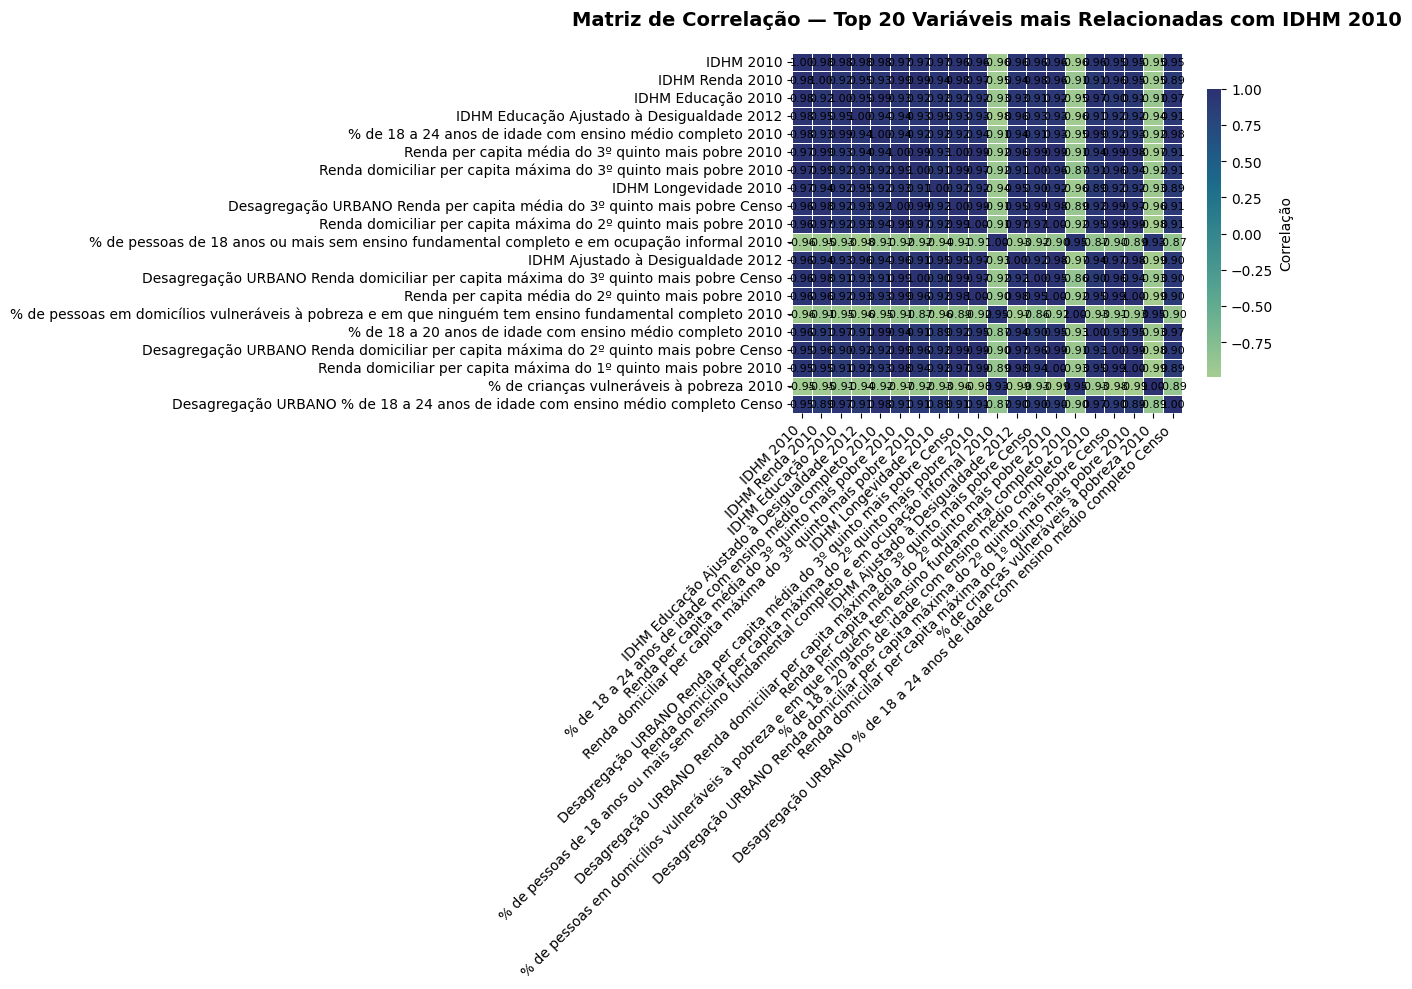

In [175]:
#  Selecionar colunas numéricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correlação com 'IDHM 2010'
correlacoes = df_num.corrwith(df_num['IDHM 2010']).dropna()

#  Selecionar as 20 variáveis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correlação
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correlação"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correlação — Top 20 Variáveis mais Relacionadas com IDHM 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.1.1 Identificação de Variáveis Altamente Correlacionadas com o IDHM
Aqui é feita uma análise mais dirigida para descobrir **quais variáveis têm correlação absoluta maior que 0.85** com o índice analisado.


In [176]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("✔️ Colunas duplicadas removidas.")

# Colunas de referência
idh_cols = ['IDHM 2010', 'IDHM Educação 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010']

# Selecionar apenas colunas numéricas (exceto os próprios índices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correlação com 'IDHM 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Variável', 'Correlação (IDHM 2010)']

high_corr_vars = correlation_results[correlation_results['Correlação (IDHM 2010)'].abs() >= 0.85]

print(f"\n=== Variáveis com |Correlação| ≥ 0.85 com IDHM 2010 ===")
display(high_corr_vars)


✔️ Colunas duplicadas removidas.

=== Variáveis com |Correlação| ≥ 0.85 com IDHM 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Variável,Correlação (IDHM 2010)
34,Subíndice de frequência escolar - IDHM Educaçã...,0.856867
35,Subíndice de escolaridade - IDHM Educação 2010,0.885821
84,IDHM Ajustado à Desigualdade 2012,0.960640
85,IDHM Longevidade Ajustado à Desigualdade 2012,0.888334
86,IDHM Educação Ajustado à Desigualdade 2012,0.976085
...,...,...
641,Desagregação RURAL % de crianças que vivem em ...,-0.856767
646,Desagregação RURAL % de pessoas de 18 anos ou ...,-0.925286
647,Desagregação RURAL % de pessoas em domicílios ...,-0.888410
663,Desagregação URBANO % de pessoas de 18 anos ou...,-0.919549


#### 5.1.2 Visualização das Variáveis mais Correlacionadas
O gráfico abaixo destaca as variáveis com maior correlação (positiva ou negativa) com o **IDHM 2010**.


/tmp/ipython-input-404654461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlação (IDHM 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')


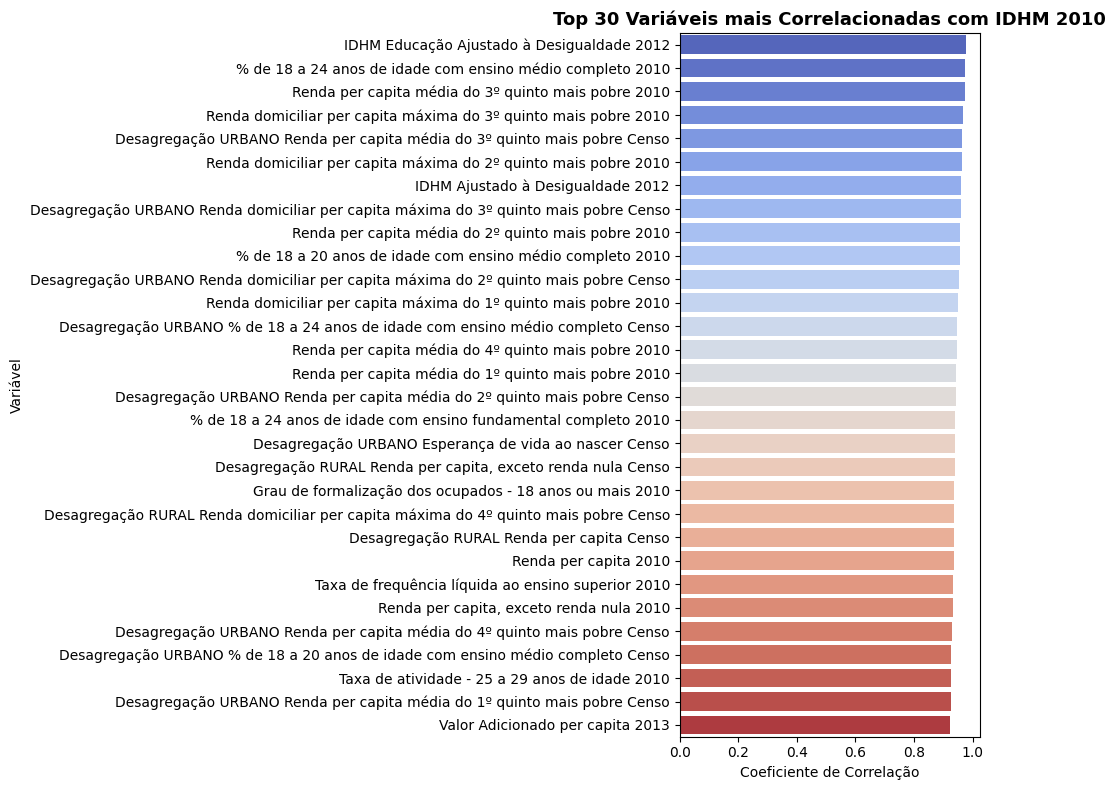

In [177]:
# Seleciona as 30 mais correlacionadas para visualização
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correlação (IDHM 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correlação (IDHM 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Variáveis mais Correlacionadas com IDHM 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Os fatores com maior correlação com o IDHM total foram:

* % de 18 a 24 anos com ensino médio completo,
* Renda per capita média dos quintos mais pobres
* IDHM ajustado à desigualdade
* Grau de formalização dos ocupados

O desenvolvimento humano no Brasil está profundamente ligado à educação e à formalização do trabalho, refletindo que a desigualdade educacional e de renda é um dos maiores limitadores de desenvolvimento. Regiões com maior acesso à educação e empregos formais tendem a ter melhor IDH, mostrando o peso do capital humano no progresso regional

### 5.2 Correlação — IDHM Educação

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


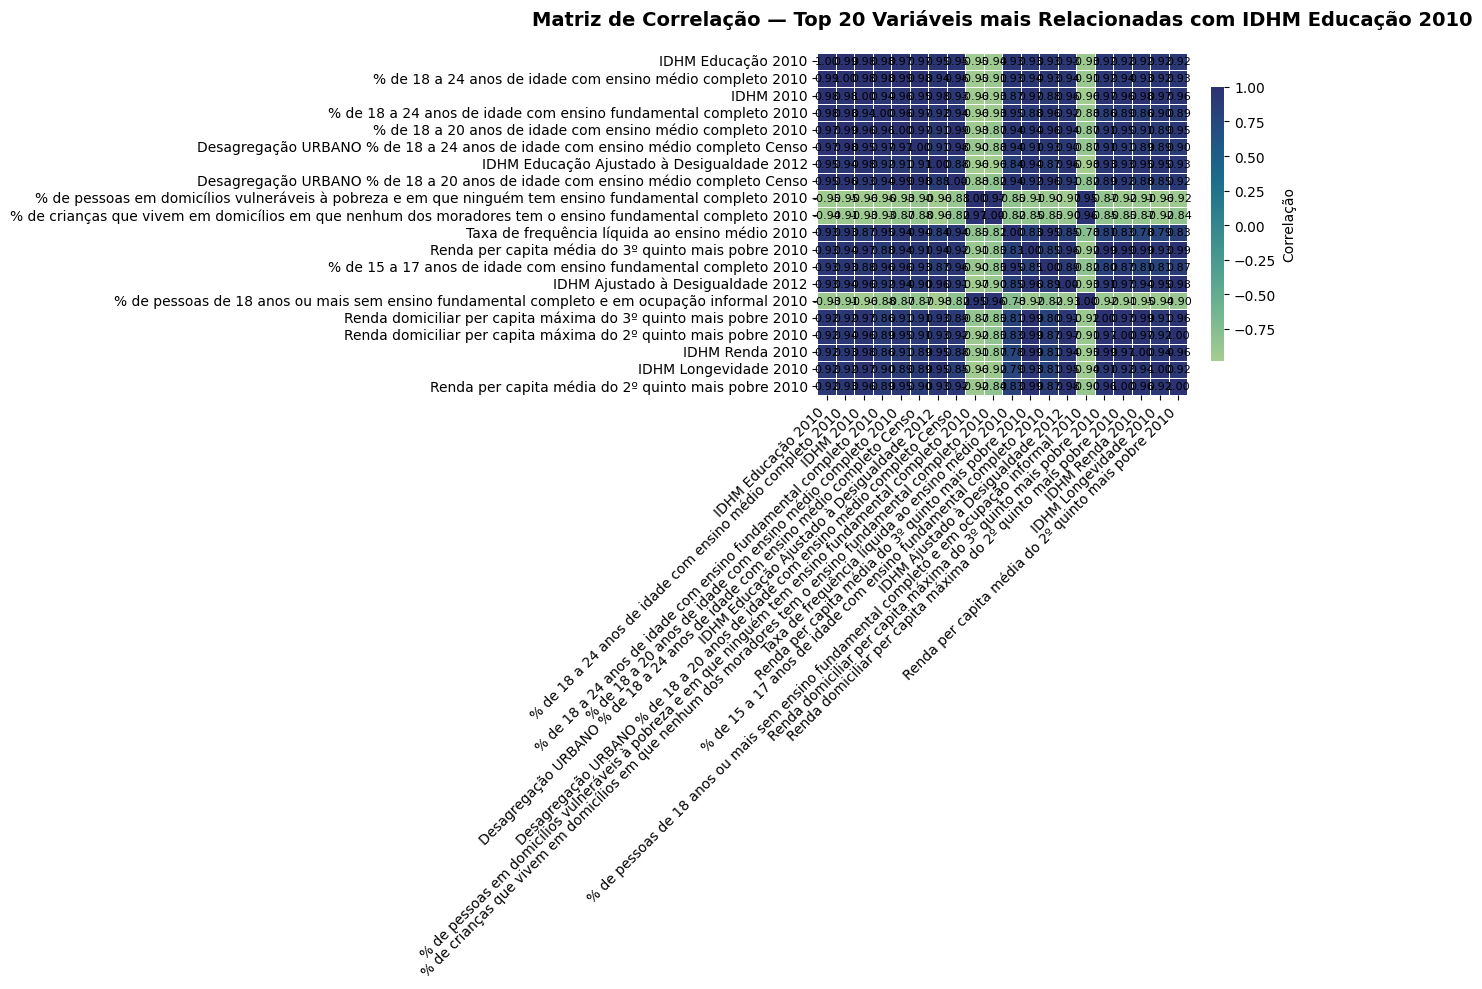

In [178]:
#  Selecionar colunas numéricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correlação com 'IDHM Educação 2010'
correlacoes = df_num.corrwith(df_num['IDHM Educação 2010']).dropna()

#  Selecionar as 20 variáveis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correlação
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correlação"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correlação — Top 20 Variáveis mais Relacionadas com IDHM Educação 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.2.1 Identificação de Variáveis Altamente Correlacionadas com o IDHM Educacional
Aqui é feita uma análise mais dirigida para descobrir quais variáveis têm correlação absoluta maior que 0.85 com o índice analisado.

In [179]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("✔️ Colunas duplicadas removidas.")

# Selecionar apenas colunas numéricas (exceto os próprios índices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correlação com 'IDHM Educação 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Educação 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Variável', 'Correlação (IDHM Educação 2010)']

high_corr_vars = correlation_results[correlation_results['Correlação (IDHM Educação 2010)'].abs() >= 0.85]

print(f"\n=== Variáveis com |Correlação| ≥ 0.85 com IDHM Educação 2010 ===")
display(high_corr_vars)


✔️ Colunas duplicadas removidas.

=== Variáveis com |Correlação| ≥ 0.85 com IDHM Educação 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Variável,Correlação (IDHM Educação 2010)
34,Subíndice de frequência escolar - IDHM Educaçã...,0.911303
35,Subíndice de escolaridade - IDHM Educação 2010,0.864501
84,IDHM Ajustado à Desigualdade 2012,0.925547
85,IDHM Longevidade Ajustado à Desigualdade 2012,0.854835
86,IDHM Educação Ajustado à Desigualdade 2012,0.952673
...,...,...
644,Desagregação RURAL % de pessoas em domicílios ...,-0.910720
646,Desagregação RURAL % de pessoas de 18 anos ou ...,-0.915251
647,Desagregação RURAL % de pessoas em domicílios ...,-0.913208
663,Desagregação URBANO % de pessoas de 18 anos ou...,-0.877028


#### 5.2.2 Visualização das Variáveis mais Correlacionadas
O gráfico abaixo destaca as variáveis com maior correlação (positiva ou negativa) com o **IDHM Educação 2010**.


/tmp/ipython-input-3545821359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlação (IDHM Educação 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')


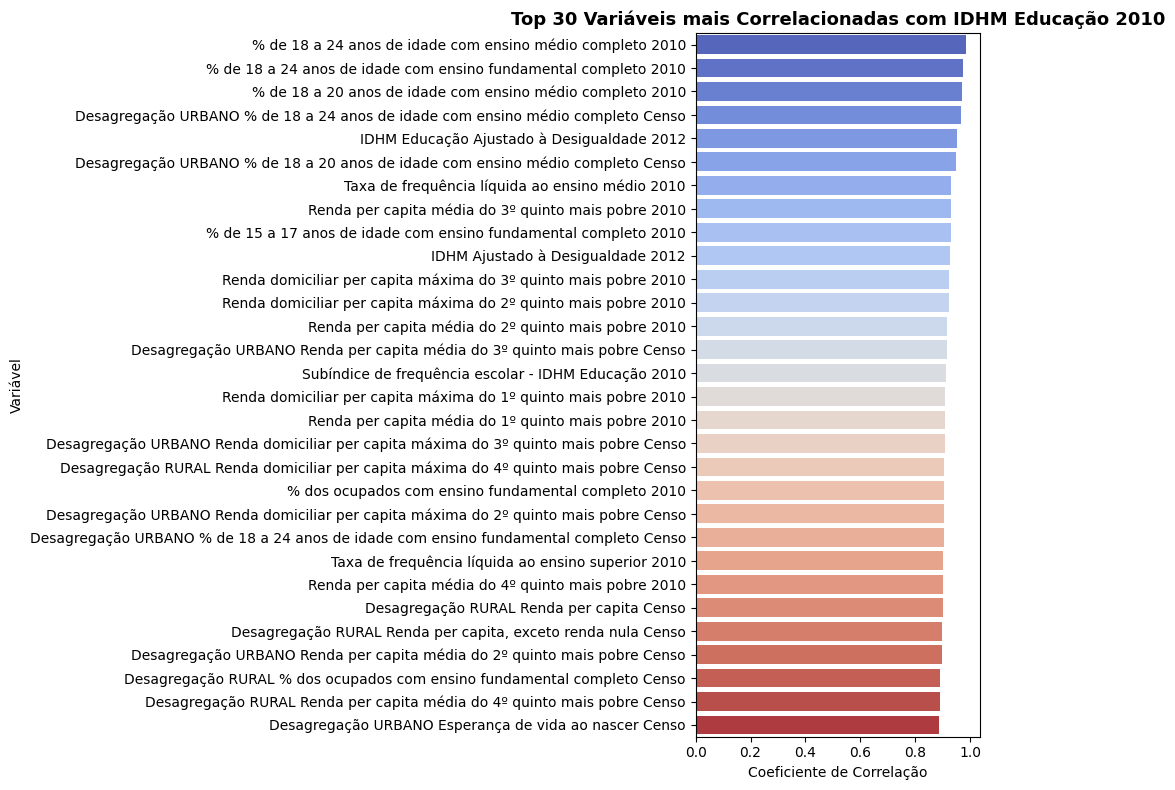

In [180]:
# Seleciona as 30 mais correlacionadas para visualização
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correlação (IDHM Educação 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correlação (IDHM Educação 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Variáveis mais Correlacionadas com IDHM Educação 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

As variáveis mais correlacionadas foram:
* Taxas de conclusão do ensino médio e fundamental
* Taxas de frequência líquida ao ensino médio
* Subíndices de escolaridade e IDHM Educação ajustado à desigualdade

A educação é um ciclo reforçador: quanto mais acesso e permanência escolar, maior o índice educacional e o desenvolvimento geral. A forte presença de variáveis relacionadas à faixa etária de 18–24 anos indica a importância da transição escolar-trabalho — uma fase crítica em que desigualdades regionais ficam mais evidentes, principalmente no Norte e Nordeste.

### 5.3 Correlação — IDHM Renda

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


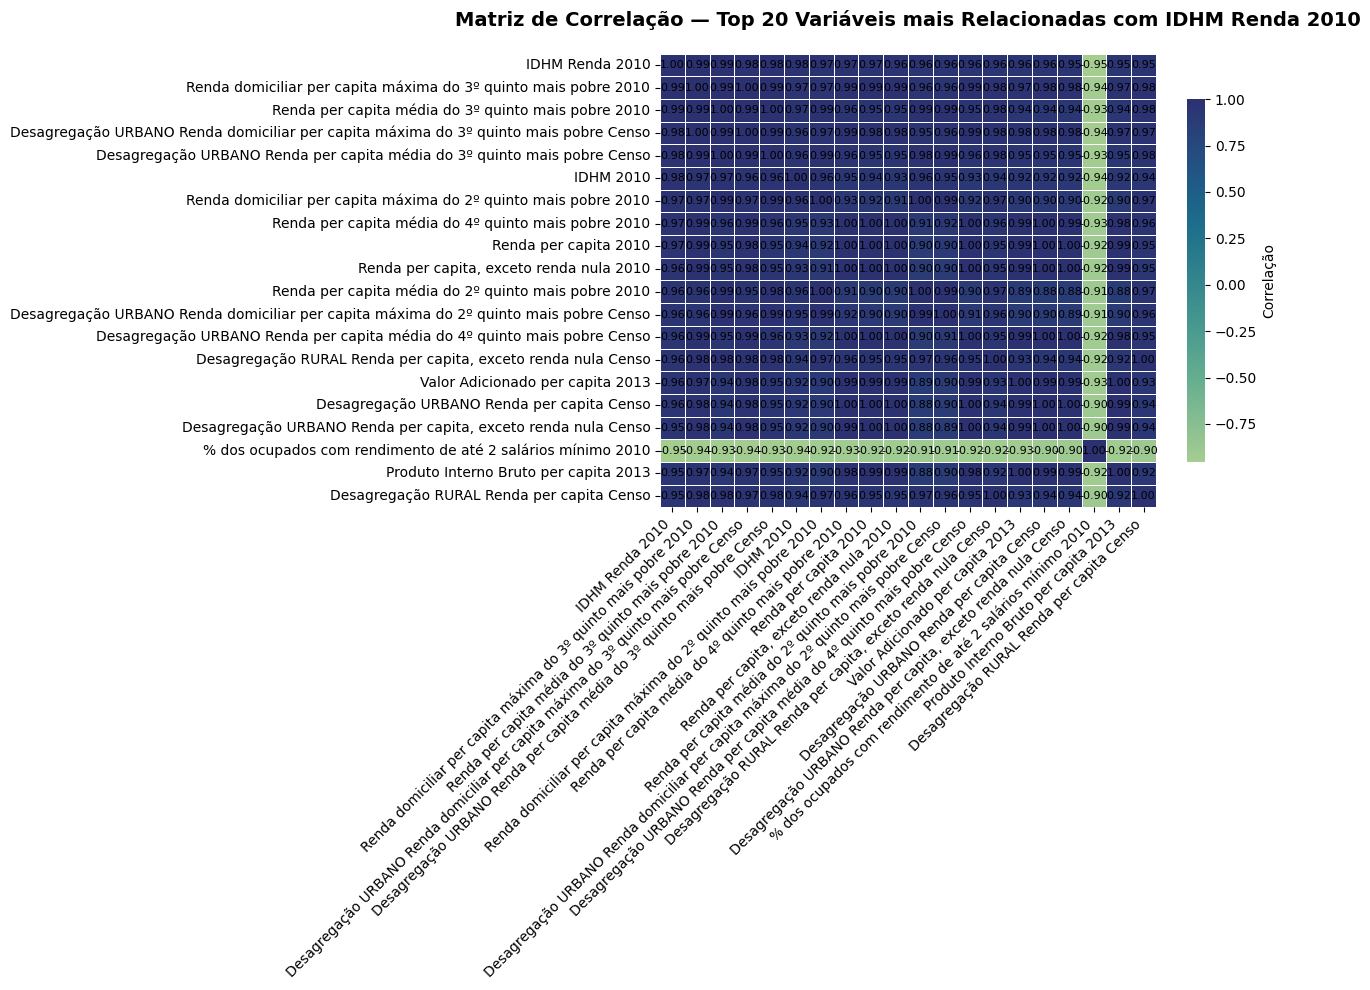

In [181]:
#  Selecionar colunas numéricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correlação com 'IDHM Renda 2010'
correlacoes = df_num.corrwith(df_num['IDHM Renda 2010']).dropna()

#  Selecionar as 20 variáveis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correlação
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correlação"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correlação — Top 20 Variáveis mais Relacionadas com IDHM Renda 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.3.1 Identificação de Variáveis Altamente Correlacionadas com o IDHM Renda
Aqui é feita uma análise mais dirigida para descobrir quais variáveis têm correlação absoluta maior que 0.85 com o índice analisado.

In [182]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("✔️ Colunas duplicadas removidas.")

# Selecionar apenas colunas numéricas (exceto os próprios índices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correlação com 'IDHM Renda 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Renda 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Variável', 'Correlação (IDHM Renda 2010)']

high_corr_vars = correlation_results[correlation_results['Correlação (IDHM Renda 2010)'].abs() >= 0.85]

print(f"\n=== Variáveis com |Correlação| ≥ 0.85 com IDHM Renda 2010 ===")
display(high_corr_vars)


✔️ Colunas duplicadas removidas.

=== Variáveis com |Correlação| ≥ 0.85 com IDHM Renda 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Variável,Correlação (IDHM Renda 2010)
35,Subíndice de escolaridade - IDHM Educação 2010,0.866044
84,IDHM Ajustado à Desigualdade 2012,0.941295
85,IDHM Longevidade Ajustado à Desigualdade 2012,0.868709
86,IDHM Educação Ajustado à Desigualdade 2012,0.950871
90,IDHM Educação Ajustado à Desigualdade - Perda ...,-0.875418
...,...,...
634,% de pessoas inscritas no Cadastro Único sem a...,-0.859071
637,% de pessoas inscritas no Cadastro Único sem c...,-0.886747
638,% de pessoas inscritas no Cadastro Único sem a...,-0.859071
646,Desagregação RURAL % de pessoas de 18 anos ou ...,-0.914453


#### 5.3.2 Visualização das Variáveis mais Correlacionadas
O gráfico abaixo destaca as variáveis com maior correlação (positiva ou negativa) com o **IDHM Renda 2010**.

/tmp/ipython-input-3787986602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlação (IDHM Renda 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')


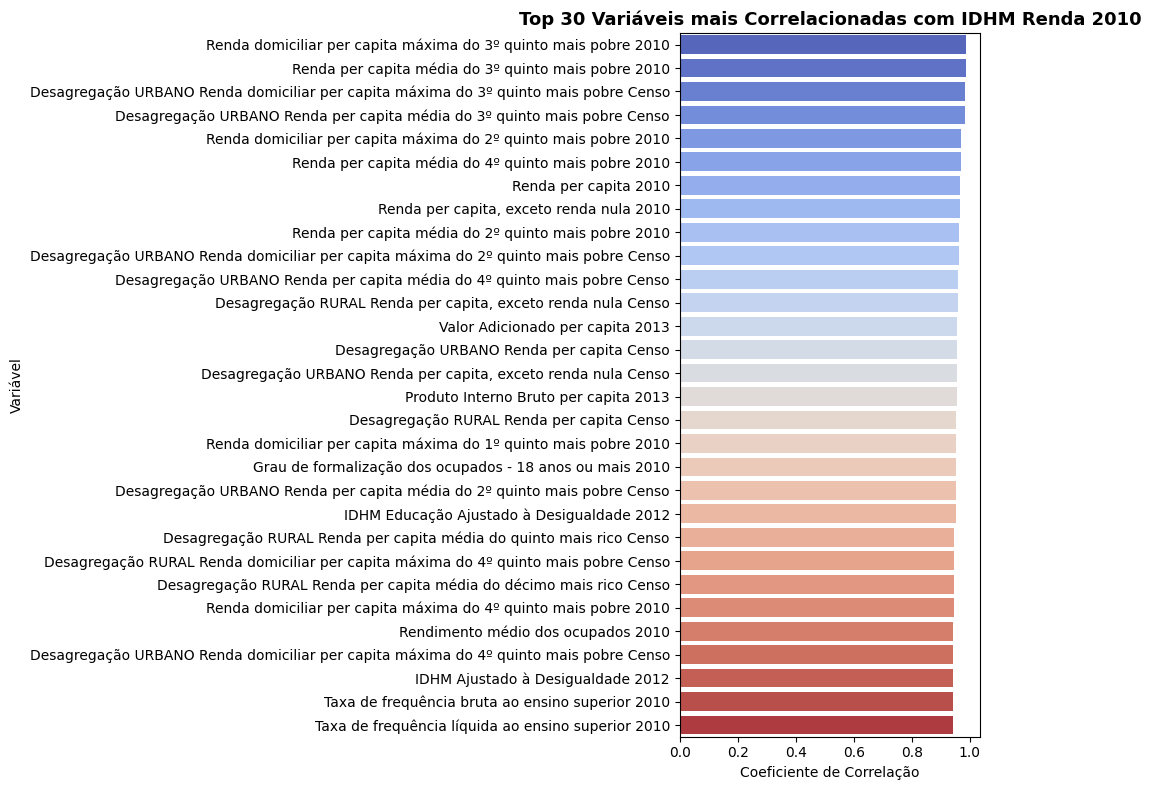

In [183]:
# Seleciona as 30 mais correlacionadas para visualização
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correlação (IDHM Renda 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correlação (IDHM Renda 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Variáveis mais Correlacionadas com IDHM Renda 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Aqui aparecem como fatores dominantes:
* Renda per capita e domiciliar
* Rendimento médio dos ocupados
* Produto Interno Bruto per capita
* Formalização dos trabalhadores

O componente de renda é o mais diretamente econômico, e as correlações revelam que a desigualdade intrarregional (ex: diferença entre quintis mais ricos e mais pobres) pesa muito.
Isso mostra que não é apenas a riqueza total que importa, mas sua distribuição, estados com melhor equilíbrio entre os quintis têm melhor desempenho socioeconômico.

### 5.4 Correlação — IDHM Longevidade

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


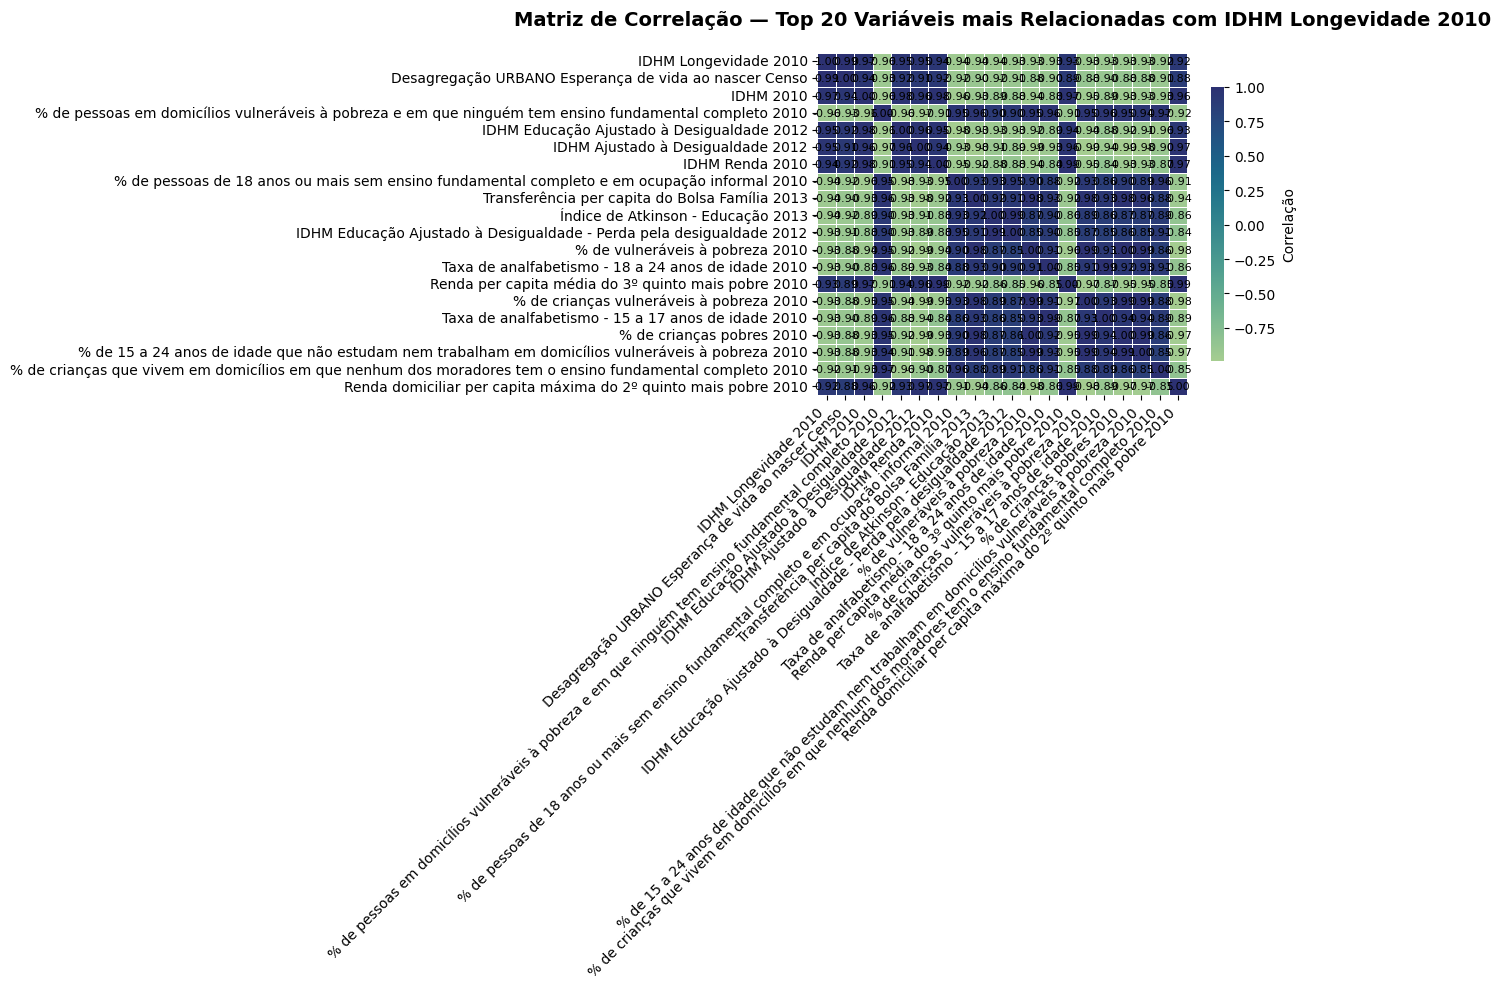

In [184]:
#  Selecionar colunas numéricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correlação com 'IDHM Longevidade 2010'
correlacoes = df_num.corrwith(df_num['IDHM Longevidade 2010']).dropna()

#  Selecionar as 20 variáveis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correlação
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correlação"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correlação — Top 20 Variáveis mais Relacionadas com IDHM Longevidade 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.4.1 Identificação de Variáveis Altamente Correlacionadas com o IDHM Longevidade
Aqui é feita uma análise mais dirigida para descobrir quais variáveis têm correlação absoluta maior que 0.85 com o índice analisado.

In [185]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("✔️ Colunas duplicadas removidas.")

# Selecionar apenas colunas numéricas (exceto os próprios índices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correlação com 'IDHM Longevidade 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Longevidade 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Variável', 'Correlação (IDHM Longevidade 2010)']

high_corr_vars = correlation_results[correlation_results['Correlação (IDHM Longevidade 2010)'].abs() >= 0.85]

print(f"\n=== Variáveis com |Correlação| ≥ 0.85 com IDHM Longevidade 2010 ===")
display(high_corr_vars)


✔️ Colunas duplicadas removidas.

=== Variáveis com |Correlação| ≥ 0.85 com IDHM Longevidade 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Variável,Correlação (IDHM Longevidade 2010)
4,Mortalidade infantil 2010,-0.905808
15,Mortalidade até 5 anos de idade 2010,-0.867718
35,Subíndice de escolaridade - IDHM Educação 2010,0.864448
84,IDHM Ajustado à Desigualdade 2012,0.953978
85,IDHM Longevidade Ajustado à Desigualdade 2012,0.891211
...,...,...
637,% de pessoas inscritas no Cadastro Único sem c...,-0.860561
638,% de pessoas inscritas no Cadastro Único sem a...,-0.856507
646,Desagregação RURAL % de pessoas de 18 anos ou ...,-0.852809
663,Desagregação URBANO % de pessoas de 18 anos ou...,-0.913780


#### 5.4.2 Visualização das Variáveis mais Correlacionadas
O gráfico abaixo destaca as variáveis com maior correlação (positiva ou negativa) com o **IDHM Longevidade 2010**.

/tmp/ipython-input-2163964855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlação (IDHM Longevidade 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')


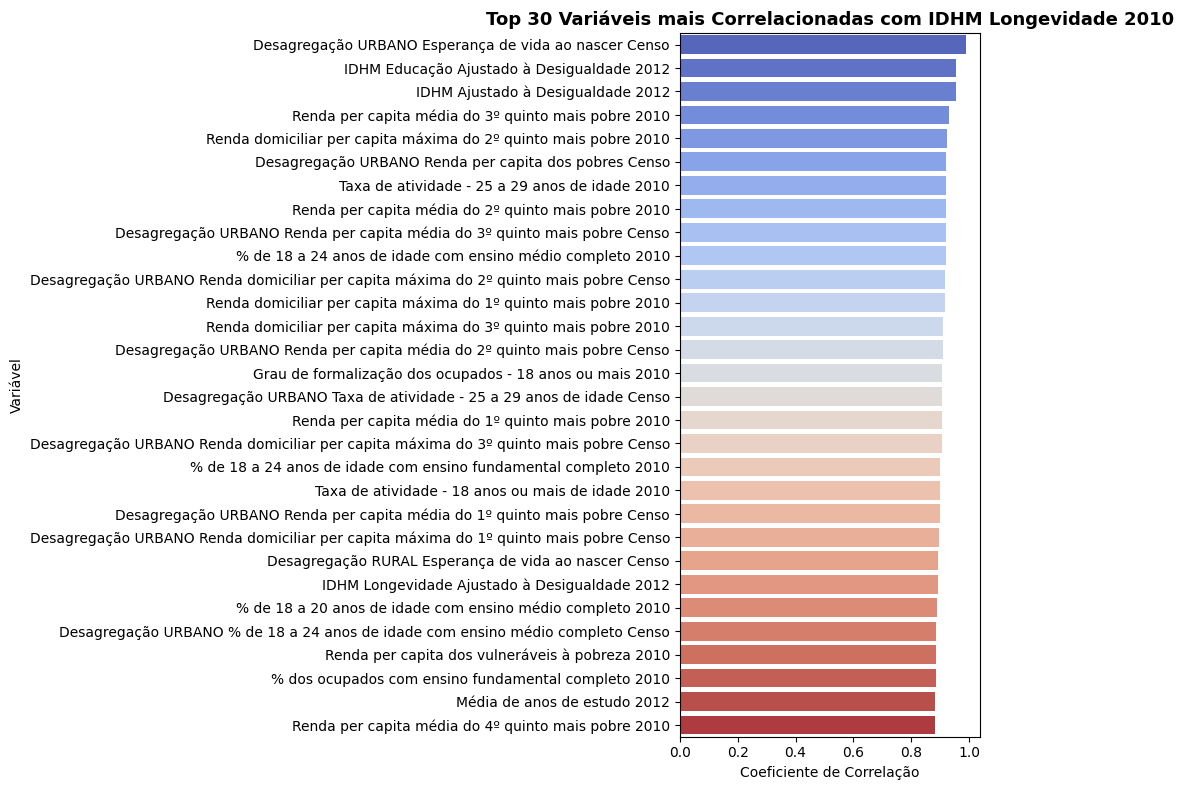

In [186]:
# Seleciona as 30 mais correlacionadas para visualização
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correlação (IDHM Longevidade 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correlação (IDHM Longevidade 2010)', y='Variável', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Variáveis mais Correlacionadas com IDHM Longevidade 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

As variáveis com maior correlação foram:
* Esperança de vida ao nascer
* Renda per capita média dos quintis intermediários
* Formalização do trabalho
* IDHM ajustado à desigualdade

A longevidade é fortemente impactada por condições de renda e estabilidade econômica. Isso evidencia a conexão entre saúde, renda e infraestrutura urbana, reforçando como as condições de vida e o acesso a serviços básicos variam drasticamente entre regiões, refletindo a diversidade e desigualdade brasileira.

## Conclusão

A partir da integração e análise dos oito conjuntos de dados socioeconômicos dos estados brasileiros, foi possível identificar de forma clara os **principais agentes que influenciam o desenvolvimento humano no Brasil**. A análise das matrizes de correlação revelou que os indicadores de **educação, renda e formalização do trabalho** apresentam as relações mais fortes com os índices de desenvolvimento humano (IDHM), especialmente em suas dimensões de **educação, renda e longevidade**.

Os resultados mostraram que:
- **Educação** é o fator mais recorrente e decisivo, refletindo-se em altas correlações entre taxas de escolaridade, frequência escolar e o próprio IDHM.  
- **Renda e formalização** do trabalho demonstram impacto direto na qualidade de vida e na longevidade, indicando que a estabilidade econômica é determinante para o desenvolvimento.  
- **Desigualdade regional e distributiva** permanece como um desafio central: mesmo em estados com crescimento econômico, a concentração de renda ainda limita avanços em outras dimensões sociais.

Esses achados reforçam que o desenvolvimento humano no Brasil é **multifatorial e profundamente desigual no território**. Enquanto regiões do Sul e Sudeste apresentam indicadores fortemente associados à educação e renda formal, o Norte e Nordeste ainda enfrentam desafios estruturais que reduzem o alcance do desenvolvimento humano pleno.

Do ponto de vista metodológico, o uso de **análises de correlação** se mostrou eficaz para identificar variáveis-chave e direcionar investigações mais profundas. Em etapas futuras, pretendo fazer a aplicação de **modelos preditivos (como regressões múltiplas ou algoritmos de machine learning)** e **visualizações geográficas** para prever tendências e mapear espacialmente as desigualdades, ampliando a compreensão dos fenômenos socioeconômicos.

Em síntese, o projeto evidencia que **educação de qualidade, equidade de renda e trabalho formal** são pilares indispensáveis para a melhoria dos índices socioeconômicos brasileiros. Compreender como esses fatores interagem em diferentes regiões é fundamental para orientar **políticas públicas mais justas e eficazes**, voltadas à redução das desigualdades e à promoção de um desenvolvimento verdadeiramente inclusivo.
